##### In this notebook, we will:
 * read in the files
 * compute the jaccard similarities, comparing things in various ways, such as tokenization methods, corpus weights, etc. 
 * The end goal here is to build a dendogram, showing similarities of books, and compare it to at least one other dendogram.

In [1]:
import pandas as pd
import numpy as np
import os
import gensim
import pickle
from gensim.utils import simple_preprocess
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
with open('../data/data_tokenized_sentence/complete_corpus_sentence_tokenized.txt', 'rb') as file:
    complete_corpus_sentence_tokenized = pickle.load(file)

In [3]:
for i in complete_corpus_sentence_tokenized .keys():
    print(i)

Address of Tatian to the Greeks
Athenagoras the Athenian
Bible Complete
Clement of Alexandria Exhortation to the Heathen
Clement of Alexandria The Salvation of the Rich Man
Clement of Alexandria Trilogy
Clement of Alexandria, The Stromata
Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew
Epistle of Adrian Antoninus and Marcus Aurelius
Epistle of Clement of Rome
False Ignatius
Fragments of Papias
Fragments of the Lost Work of Justin on the Resurrection
Hippolytus of Rome Expository Treatise Against The Jews
Hippolytus of Rome Treatise On Christ and Antichrist
Igantius Syriac Epistles
Ignatius Other
Ireanaus Against Heresies Book III
Ireanaus Fragments from the Lost Writings
Irenaeus Against Heresies Book I
Irenaeus Against Heresies Book II
Irenaeus Against Heresies Book V
Ireneaus Against Heresies Book IV
Justin's Hortatory Address to the Greeks
New Testament
Old Testament
Origen
Tertullian
The Didache
The Epistle of Barnabas
The Epistle of Ignatius to Polycarp
The Epistle 

In [4]:
#need to return values as a set:

complete_corpus_sentence_tokenized_set={}

for i,v in complete_corpus_sentence_tokenized.items():
    dict_value=set(v)
    complete_corpus_sentence_tokenized_set[i]=dict_value

In [5]:
def jaccard (tok1, tok2):
    return len(tok1.intersection(tok2))/ len(tok1.union(tok2))

In [6]:
dists = np.zeros(shape = (len(complete_corpus_sentence_tokenized_set), len(complete_corpus_sentence_tokenized_set)))

In [7]:

for i, doc1 in (enumerate(complete_corpus_sentence_tokenized_set.keys())):
    for j, doc2 in enumerate(complete_corpus_sentence_tokenized_set.keys()):
        if i == j:
            dists[i][j]=0
        elif i > j:
            dists[i][j] = dists[j][i]
        else:
            dists[i][j]=1-jaccard(complete_corpus_sentence_tokenized_set[doc1], complete_corpus_sentence_tokenized_set[doc2])

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [9]:
mergings1 = linkage(squareform(dists), method='complete')
with open('../pngs/mergings1.set', 'wb') as file:
    pickle.dump(mergings1, file)
    
complete_corpus_sentence_tokenized_names=complete_corpus_sentence_tokenized_set.keys()
complete_corpus_sentence_tokenized_names=list(complete_corpus_sentence_tokenized_names)
with open('../pngs/complete_corpus_sentence_tokenized_names.set', 'wb') as file:
    pickle.dump(complete_corpus_sentence_tokenized_names, file)

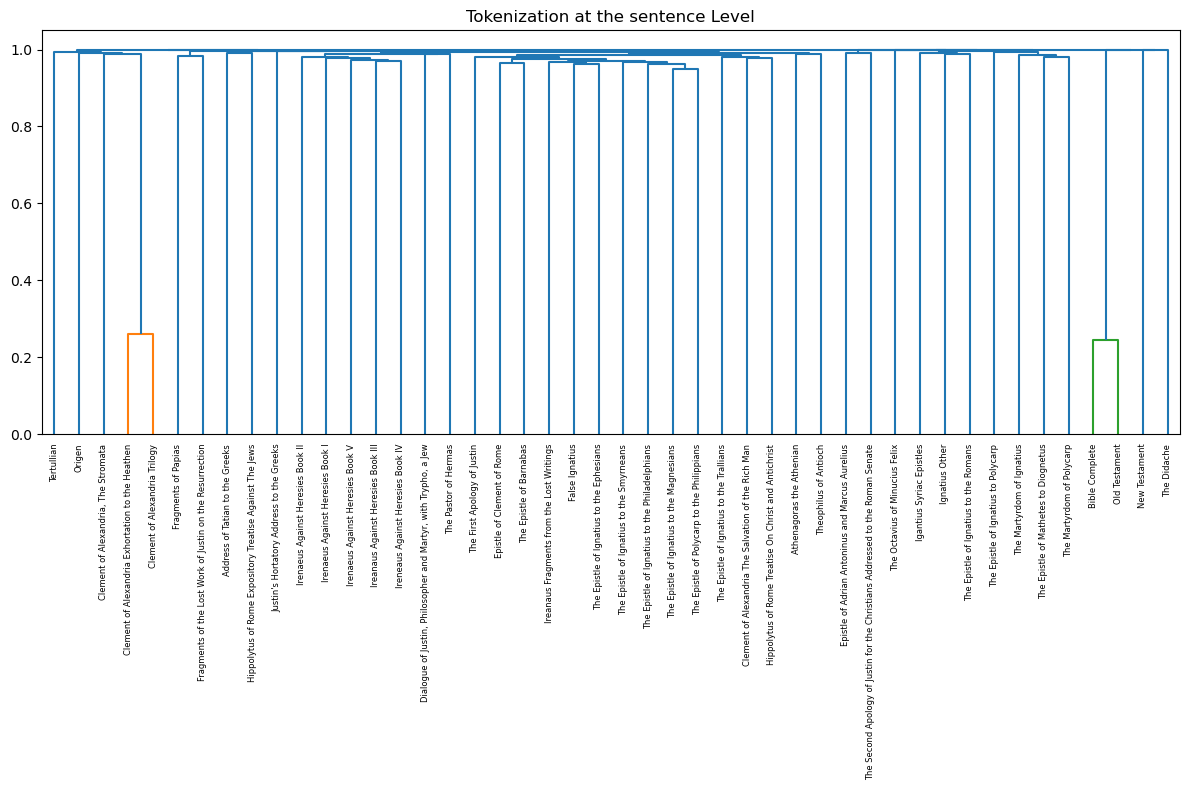

In [10]:
plt.figure(figsize=(12, 8))

dendrogram(mergings1,
           labels = list(complete_corpus_sentence_tokenized_set.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);
plt.title('Tokenization at the sentence Level')

plt.tight_layout()
plt.savefig('jaccard_sentence.png', pad_inches=0.1, dpi=300)
plt.show()

In [11]:
#Note the above, that at a sentence level, they seem to be very dissimilar.
#What about at a word level?

In [12]:
with open('../data/data_tokenized_word/complete_corpus_word_tokenized.txt', 'rb') as file:
    complete_corpus_word_tokenized = pickle.load(file)

In [13]:
complete_corpus_word_tokenized

{'Address of Tatian to the Greeks': ['Address',
  'of',
  'Tatian',
  'to',
  'the',
  'Greeks',
  '__________________________________________________________________',
  '__________________________________________________________________',
  'Chapter',
  'I',
  'The',
  'Greeks',
  'Claim',
  'Without',
  'Reason',
  'the',
  'Invention',
  'of',
  'the',
  'Arts',
  'Be',
  'not',
  'O',
  'Greeks',
  'so',
  'very',
  'hostilely',
  'disposed',
  'towards',
  'the',
  'Barbarians',
  'nor',
  'look',
  'with',
  'ill',
  'will',
  'on',
  'their',
  'opinions',
  'For',
  'which',
  'of',
  'your',
  'institutions',
  'has',
  'not',
  'been',
  'derived',
  'from',
  'the',
  'Barbarians',
  'The',
  'most',
  'eminent',
  'of',
  'the',
  'Telmessians',
  'invented',
  'the',
  'art',
  'of',
  'divining',
  'by',
  'dreams',
  'the',
  'Carians',
  'that',
  'of',
  'prognosticating',
  'by',
  'the',
  'stars',
  'the',
  'Phrygians',
  'and',
  'the',
  'most',
  'ancient',
  '

In [14]:

complete_corpus_word_tokenized_set={}

for i,v in complete_corpus_word_tokenized.items():
    dict_value=set(v)
    complete_corpus_word_tokenized_set[i]=dict_value

In [15]:
dists = np.zeros(shape = (len(complete_corpus_word_tokenized_set), len(complete_corpus_word_tokenized_set)))

In [16]:

for i, doc1 in (enumerate(complete_corpus_word_tokenized_set.keys())):
    for j, doc2 in enumerate(complete_corpus_word_tokenized_set.keys()):
        if i == j:
            dists[i][j]=0
        elif i > j:
            dists[i][j] = dists[j][i]
        else:
            dists[i][j]=1-jaccard(complete_corpus_word_tokenized_set[doc1], complete_corpus_word_tokenized_set[doc2])

In [17]:
mergings2 = linkage(squareform(dists), method='complete')
with open('../pngs/mergings2.set', 'wb') as file:
    pickle.dump(mergings2, file)


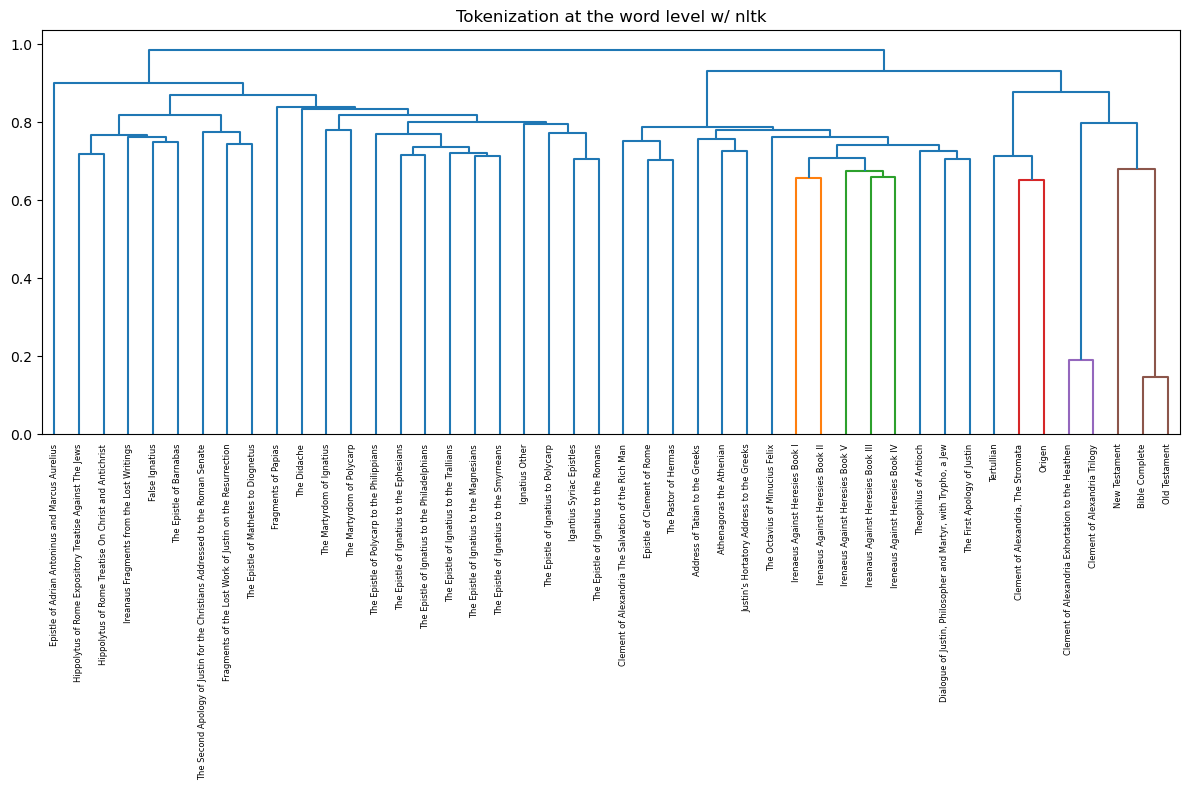

In [18]:
mergings = linkage(squareform(dists), method='complete')

plt.figure(figsize = (12,8))
dendrogram(mergings2,
           labels = list(complete_corpus_word_tokenized_set.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);
plt.title('Tokenization at the word level w/ nltk')
plt.savefig('jaccard_word_nltk.png')
plt.tight_layout()

In [19]:
with open('../data/data_simple_preprocess/complete_corpus_simple_preprocess.txt', 'rb') as file:
    complete_corpus_simple_preprocess = pickle.load(file)

In [20]:

complete_corpus_simple_preprocess_set={}

for i,v in complete_corpus_simple_preprocess.items():
    dict_value=set(v)
    complete_corpus_simple_preprocess_set[i]=dict_value

In [21]:
dists = np.zeros(shape = (len(complete_corpus_simple_preprocess_set), len(complete_corpus_simple_preprocess_set)))

In [22]:

for i, doc1 in (enumerate(complete_corpus_simple_preprocess_set.keys())):
    for j, doc2 in enumerate(complete_corpus_simple_preprocess_set.keys()):
        if i == j:
            dists[i][j]=0
        elif i > j:
            dists[i][j] = dists[j][i]
        else:
            dists[i][j]=1-jaccard(complete_corpus_simple_preprocess_set[doc1], complete_corpus_simple_preprocess_set[doc2])

In [23]:
mergings3 = linkage(squareform(dists), method='complete')
with open('../pngs/mergings3.set', 'wb') as file:
    pickle.dump(mergings3, file)

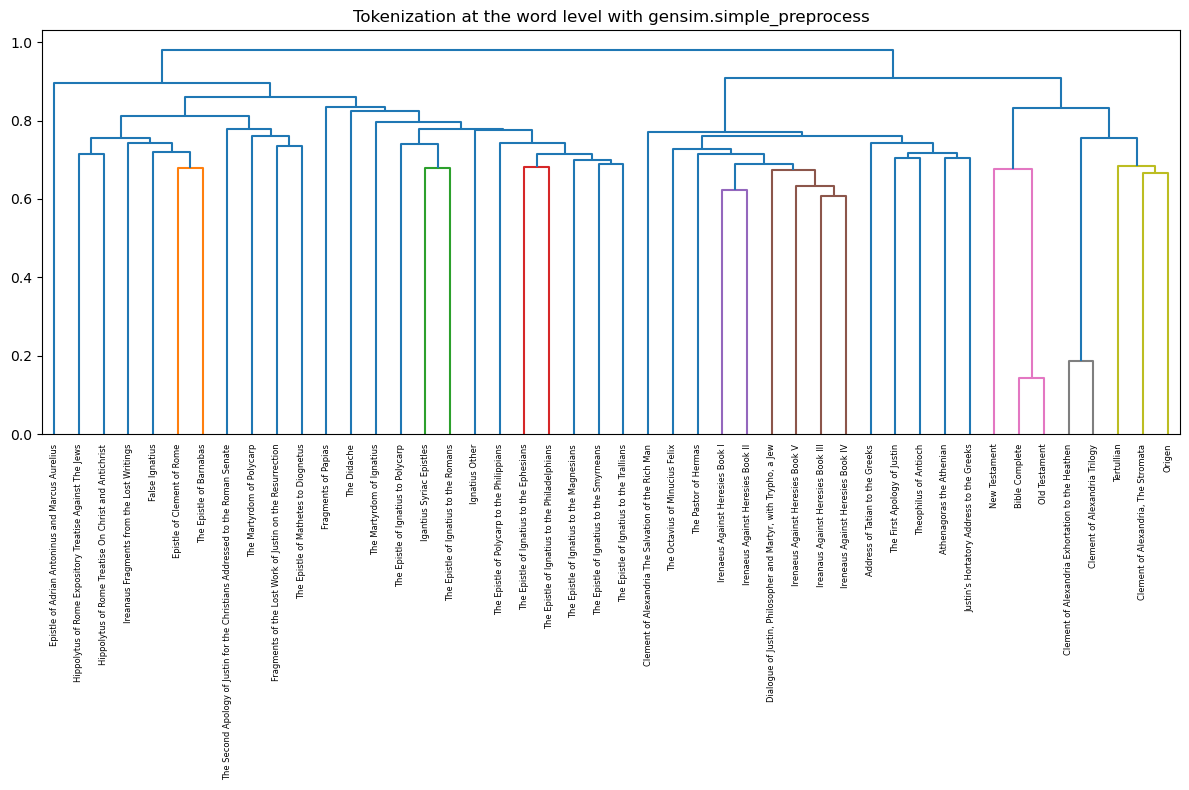

In [24]:

plt.figure(figsize = (12,8))
dendrogram(mergings3,
           labels = list(complete_corpus_simple_preprocess_set.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);
plt.title('Tokenization at the word level with gensim.simple_preprocess')
plt.savefig('jaccard_simple_preprocess.png')
plt.tight_layout()

In [25]:
with open('../data/data_simple_preprocess/complete_corpus_simple_preprocess_sw_removed.txt', 'rb') as file:
    complete_corpus_simple_preprocess_sw_removed = pickle.load(file)

In [26]:

complete_corpus_simple_preprocess_sw_removed_set={}

for i,v in complete_corpus_simple_preprocess_sw_removed.items():
    dict_value=set(v)
    complete_corpus_simple_preprocess_sw_removed_set[i]=dict_value

In [27]:
dists = np.zeros(shape = (len(complete_corpus_simple_preprocess_sw_removed_set), len(complete_corpus_simple_preprocess_sw_removed_set)))

In [28]:

for i, doc1 in (enumerate(complete_corpus_simple_preprocess_sw_removed_set.keys())):
    for j, doc2 in enumerate(complete_corpus_simple_preprocess_sw_removed_set.keys()):
        if i == j:
            dists[i][j]=0
        elif i > j:
            dists[i][j] = dists[j][i]
        else:
            dists[i][j]=1-jaccard(complete_corpus_simple_preprocess_sw_removed_set[doc1], complete_corpus_simple_preprocess_sw_removed_set[doc2])

In [29]:
mergings4 = linkage(squareform(dists), method='complete')
with open('../pngs/mergings4.set', 'wb') as file:
    pickle.dump(mergings4, file)

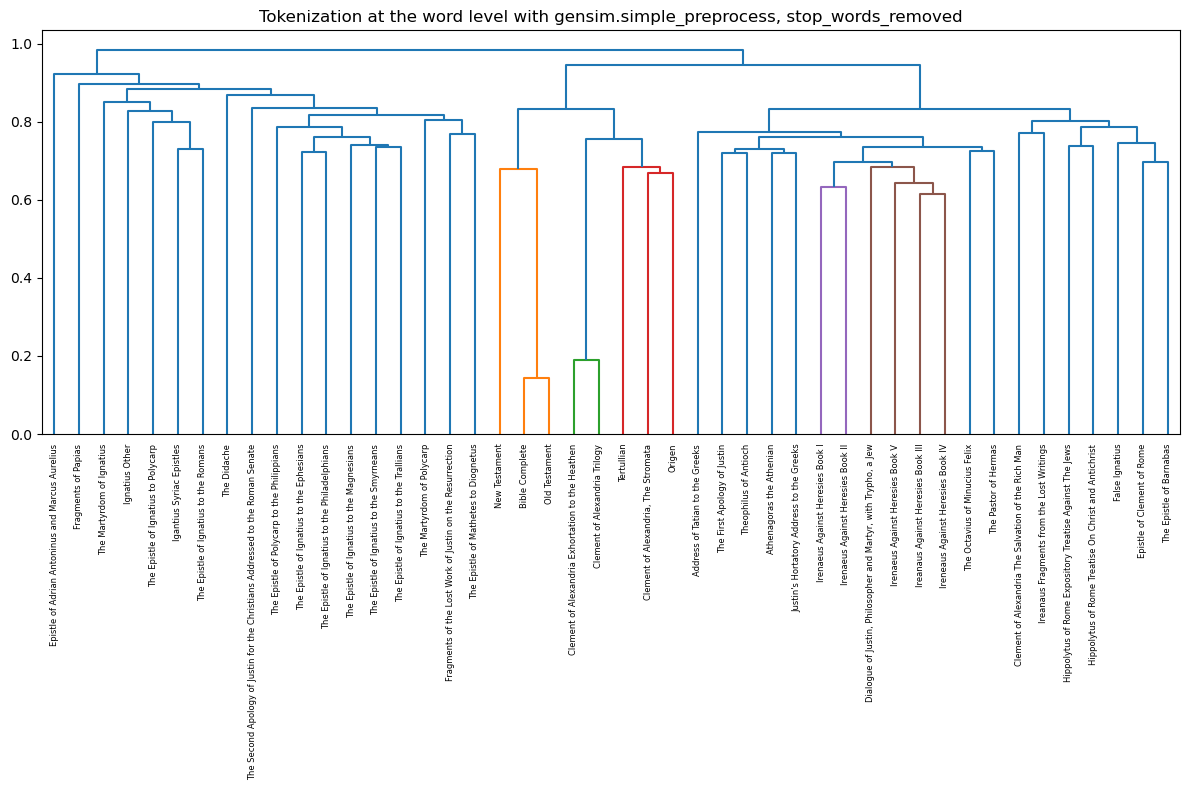

In [30]:

plt.figure(figsize = (12,8))
dendrogram(mergings4,
           labels = list(complete_corpus_simple_preprocess_sw_removed_set.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);
plt.title('Tokenization at the word level with gensim.simple_preprocess, stop_words_removed')
plt.savefig('jaccard_simple_preprocess_sw_removed.png')
plt.tight_layout()